<a href="https://colab.research.google.com/github/prayas99/AnomalyDetection/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
np.random.seed(0)
data = 2*np.random.uniform(size=(10000,2))-1

In [ ]:
data.shape

(10000, 2)

In [ ]:
data[0]

array([0.09762701, 0.43037873])

In [ ]:
y = []
y = [1 if x[0]*x[1]<0 else 0 for x in data]
#y = np.reshape(y,(10000,1))
#y.shape
df2 = pd.DataFrame(
    data, columns=['x1','x2']
)
df2['y'] = y
display(df2)
# df = pd.DataFrame({
#     'x1':data[0],
#     'x2':data[1],
#     'y':y
# })
# df.head()

,x1,x2,y
0,0.097627,0.430379,0
1,0.205527,0.089766,0
2,-0.152690,0.291788,1
3,-0.124826,0.783546,1
4,0.927326,-0.233117,1
...,...,...,...
9995,0.073616,0.057428,0
9996,0.213897,0.410607,0
9997,0.907101,0.496349,0
9998,-0.403467,-0.107088,0


In [ ]:
import torch
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)

shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(trainset)
#print(dataset_size)
indices = list(range(dataset_size))
split = int(np.floor((1/6) * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, test_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64,sampler=train_sampler, drop_last=True)
test_loader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                                sampler=test_sampler,drop_last=True)
validation_loader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

print(len(train_loader)*64)
print(len(validation_loader)*64)
print(len(test_loader)*64)

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw





Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw
Processing...
Done!
49984
10048
9984


In [ ]:
# import torch
# import numpy as np
# from torchvision import datasets
# from torchvision import transforms
# from torch.utils.data.sampler import SubsetRandomSampler
# from torch.utils.data import Dataset, DataLoader
# import torch.nn.functional as F
# class CustomDatasetFromCSV(Dataset):
#     def __init__(self, data, transform=None):
#         self.data = data #torch.FloatTensor(data.values.astype('float'))
#         self.transforms = transforms
#         self.to_tensor = transforms.ToTensor()

#     def __getitem__(self, index):
#         # This method should return only 1 sample and label 
#         # (according to "index"), not the whole dataset
#         # So probably something like this for you:
#         target = self.data.iloc[index,-1]
#         data_val = self.data.iloc[index,:-1]
#         target = torch.tensor(target)
#         data_val = torch.tensor(data_val,dtype=torch.float32) 
#         return data_val,target

#     def __len__(self):
#         return len(self.data)


# dataset = CustomDatasetFromCSV(df2)
# batch_size = 16
# validation_split = .15
# test_split = .15
# shuffle_dataset = True
# random_seed= 42

# # Creating data indices for training and validation splits:
# dataset_size = len(dataset)
# print(dataset_size)
# indices = list(range(dataset_size))
# split = int(np.floor((validation_split+test_split) * dataset_size))
# if shuffle_dataset :
#     np.random.seed(random_seed)
#     np.random.shuffle(indices)
# train_indices, val_indices, test_indices = indices[split:], indices[:split//2], indices[split//2:split]

# # Creating PT data samplers and loaders:
# train_sampler = SubsetRandomSampler(train_indices)
# valid_sampler = SubsetRandomSampler(val_indices)
# test_sampler = SubsetRandomSampler(test_indices)

# train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
#                                            sampler=train_sampler,drop_last=True)
# validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
#                                                 sampler=valid_sampler,drop_last=True)
# test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
#                                                 sampler=test_sampler,drop_last=True)

In [ ]:
class mymodel(torch.nn.Module):
    def __init__(self, D_in, H=128, D_out=2):
        """
        In the constructor we construct three nn.Linear instances that we will use
        in the forward pass.
        """
        super(mymodel, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)
        self.output_linear = torch.nn.Linear(H, D_out)

    def forward(self, x):
            # Max pooling over a (2, 2) window
            x = F.relu(self.input_linear(x))
            x = self.output_linear(x)
            return x

In [ ]:
print(len(train_loader))
print(len(validation_loader))
print(len(test_loader))

781
157
156


In [ ]:
D_in = 28*28; H = 128; D_out = 10
model = mymodel(D_in, H, D_out)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
if torch.cuda.is_available():
    model.to('cuda')
# Initialize steps
step = 0
epochs=100
train_loss_list = []
valid_loss_list = []
train_acc_l = []
val_acc_l = []
# Iterate over number of epochs
for e in range(epochs):
    running_loss_train = 0 
    running_loss_valid = 0
    validation_correct = 0
    validation_total = 0

    training_correct = 0
    training_total = 0  
                  
    

    # Iterate over the entire training dataset
    # one batch per iteration 
    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.shape[0], -1)

        # Clear the gradients of all optimized tensors
        optimizer.zero_grad()
        if torch.cuda.is_available():
            inputs, labels = inputs.to('cuda'), labels.to('cuda')   
        else:
            inputs, labels = input_images, labels        
        # Forward pass
        model.train()
        outputs = model.forward(inputs)
        _, predicted = torch.max(outputs.data, 1)
        #print(predicted,labels)
    
        #print(predicted,labels)

        training_total += labels.size(0)
        training_correct += (predicted == labels).sum().item() 
        #no_grad() prevents tracking history (and using memory)
        # with torch.no_grad(): 
            
        #     # Iterate over the entire validation dataset
        #     for input_images3, labels3 in train_loader:
                
        #         # Enable CUDA: use GPUs for model computation
        #         if torch.cuda.is_available():
        #             input_images3, labels3 = input_images3.to('cuda'), labels3.to('cuda')
                
        #         # Make predictions 
        #         outputs3 = model(input_images3)
        #         #print(outputs3)
        #         _, predicted3 = torch.max(outputs3.data, 1)
        #         #print(predicted2,labels2)
                
        #         # Count total and correct predictions
  

        
        train_loss = criterion(outputs, labels)
        
        train_acc = training_correct / training_total
        # Backward pass
        train_loss.backward()
        optimizer.step()
        
        # Calculate and print running training loss
        running_loss_train += train_loss.item()   
        
    with torch.no_grad():    
            #count=0         
            # Iterate over the entire validation dataset
            for input_images2, labels2 in validation_loader:
                
                # Enable CUDA: use GPUs for model computation
                #count+=1
                #print(count)
                input_images2 = input_images2.view(input_images2.shape[0], -1)
                if torch.cuda.is_available():
                    input_images2, labels2 = input_images2.to('cuda'), labels2.to('cuda')
                
                # Make predictions 
                outputs2 = model.forward(input_images2)
                _, predicted2 = torch.max(outputs2.data, 1)
                #print(predicted2,labels2)
                
                # Count total and correct predictions
                validation_total += labels2.size(0)
                validation_correct += (predicted2 == labels2).sum().item()   
                valid_loss = criterion(outputs2, labels2)
                val_acc = validation_correct / validation_total
                running_loss_valid += valid_loss.item()  
    
    print("Epoch: {}/{}... ".format(e+1, epochs),
          "| Train Loss: {:.4f}".format(running_loss_train/len(train_loader)),
          "| Val Loss: {:.4f}".format(running_loss_valid/len(validation_loader)),
          "| Train Acc: {:.4f}".format(train_acc),
          "| Val Acc: {:.4f}".format(val_acc))
    train_loss_list.append(running_loss_train/len(train_loader))
    valid_loss_list.append(running_loss_valid/len(validation_loader))
    train_acc_l.append(train_acc)
    val_acc_l.append(val_acc)
          
    running_loss_train = 0
    running_loss_valid = 0

Epoch: 1/100...  | Train Loss: 1.9577 | Val Loss: 1.5980 | Train Acc: 0.5255 | Val Acc: 0.7162
Epoch: 2/100...  | Train Loss: 1.3138 | Val Loss: 1.0583 | Train Acc: 0.7571 | Val Acc: 0.7998
Epoch: 3/100...  | Train Loss: 0.9237 | Val Loss: 0.7869 | Train Acc: 0.8168 | Val Acc: 0.8429
Epoch: 4/100...  | Train Loss: 0.7280 | Val Loss: 0.6457 | Train Acc: 0.8421 | Val Acc: 0.8578
Epoch: 5/100...  | Train Loss: 0.6201 | Val Loss: 0.5636 | Train Acc: 0.8553 | Val Acc: 0.8676
Epoch: 6/100...  | Train Loss: 0.5533 | Val Loss: 0.5111 | Train Acc: 0.8643 | Val Acc: 0.8744
Epoch: 7/100...  | Train Loss: 0.5085 | Val Loss: 0.4703 | Train Acc: 0.8714 | Val Acc: 0.8821
Epoch: 8/100...  | Train Loss: 0.4765 | Val Loss: 0.4426 | Train Acc: 0.8762 | Val Acc: 0.8849
Epoch: 9/100...  | Train Loss: 0.4524 | Val Loss: 0.4241 | Train Acc: 0.8799 | Val Acc: 0.8876
Epoch: 10/100...  | Train Loss: 0.4333 | Val Loss: 0.4054 | Train Acc: 0.8843 | Val Acc: 0.8900
Epoch: 11/100...  | Train Loss: 0.4182 | Val Loss

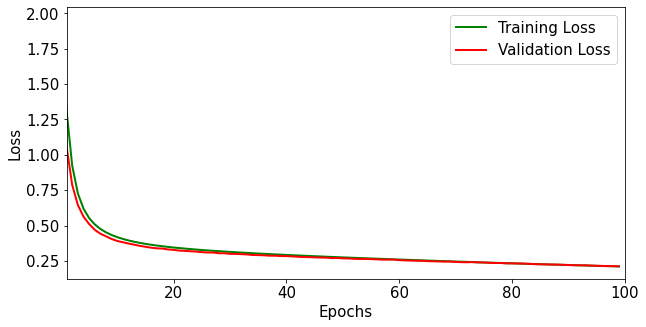

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_loss_list,c='g',label="Training Loss",linewidth=2)
plt.plot(valid_loss_list,c='r',label="Validation Loss",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(1,100)
plt.legend()
plt.show()

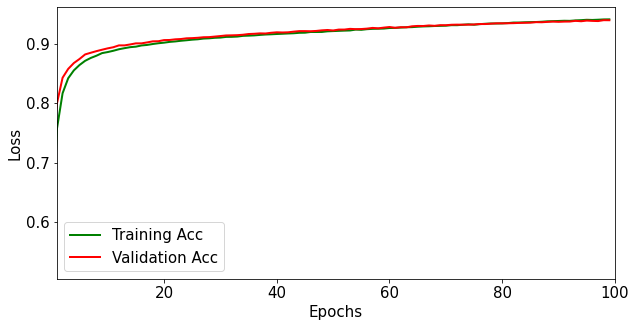

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_acc_l,c='g',label="Training Acc",linewidth=2)
plt.plot(val_acc_l,c='r',label="Validation Acc",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(1,100)
plt.legend()
plt.show()

In [ ]:
H_list = [32,64,128,256,512]
dict_trainL = {}
dict_valL = {}
dict_trainAcc={}
dict_valAcc={}

for H in H_list:
    D_in = 28*28; H = H; D_out = 10

    model = mymodel(D_in, H, D_out)

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
    if torch.cuda.is_available():
        model.to('cuda')
    # Initialize steps
    step = 0
    epochs = 20
    train_loss_list = []
    valid_loss_list = []
    train_acc_l = []
    val_acc_l = []
    # Iterate over number of epochs
    for e in range(epochs):
        running_loss_train = 0 
        running_loss_valid = 0
        validation_correct = 0
        validation_total = 0

        training_correct = 0
        training_total = 0  
                      
        

        # Iterate over the entire training dataset
        # one batch per iteration 
        for inputs, labels in train_loader:

            # Clear the gradients of all optimized tensors
            inputs = inputs.view(inputs.shape[0], -1)

            optimizer.zero_grad()
            if torch.cuda.is_available():
                inputs, labels = inputs.to('cuda'), labels.to('cuda')   
            else:
                inputs, labels = input_images, labels        
            # Forward pass
            model.train()
            outputs = model.forward(inputs)
            _, predicted = torch.max(outputs.data, 1)
            #print(predicted,labels)
        
            #print(predicted,labels)

            training_total += labels.size(0)
            training_correct += (predicted == labels).sum().item() 
            #no_grad() prevents tracking history (and using memory)
            # with torch.no_grad(): 
                
            #     # Iterate over the entire validation dataset
            #     for input_images3, labels3 in train_loader:
                    
            #         # Enable CUDA: use GPUs for model computation
            #         if torch.cuda.is_available():
            #             input_images3, labels3 = input_images3.to('cuda'), labels3.to('cuda')
                    
            #         # Make predictions 
            #         outputs3 = model(input_images3)
            #         #print(outputs3)
            #         _, predicted3 = torch.max(outputs3.data, 1)
            #         #print(predicted2,labels2)
                    
            #         # Count total and correct predictions
      

            
            train_loss = criterion(outputs, labels)
            
            train_acc = training_correct / training_total
            # Backward pass
            train_loss.backward()
            optimizer.step()
            
            # Calculate and print running training loss
            running_loss_train += train_loss.item()   
            
        with torch.no_grad():    
                #count=0         
                # Iterate over the entire validation dataset
                for input_images2, labels2 in validation_loader:
                    
                    # Enable CUDA: use GPUs for model computation
                    #count+=1
                    input_images2 = input_images2.view(input_images2.shape[0], -1)
                    #print(count)
                    if torch.cuda.is_available():
                        input_images2, labels2 = input_images2.to('cuda'), labels2.to('cuda')
                    
                    # Make predictions 
                    outputs2 = model.forward(input_images2)
                    _, predicted2 = torch.max(outputs2.data, 1)
                    #print(predicted2,labels2)
                    
                    # Count total and correct predictions
                    validation_total += labels2.size(0)
                    validation_correct += (predicted2 == labels2).sum().item()   
                    valid_loss = criterion(outputs2, labels2)
                    val_acc = validation_correct / validation_total
                    running_loss_valid += valid_loss.item()  
        
        print("Epoch: {}/{}... ".format(e+1, epochs),
              "| Train Loss: {:.4f}".format(running_loss_train/len(train_loader)),
              "| Val Loss: {:.4f}".format(running_loss_valid/len(validation_loader)),
              "| Train Acc: {:.4f}".format(train_acc),
              "| Val Acc: {:.4f}".format(val_acc))
        train_loss_list.append(running_loss_train/len(train_loader))
        valid_loss_list.append(running_loss_valid/len(validation_loader))
        train_acc_l.append(train_acc)
        val_acc_l.append(val_acc)
              
        running_loss_train = 0
        running_loss_valid = 0
    dict_trainL[H] = train_loss_list
    dict_valL[H] = valid_loss_list
    dict_trainAcc[H] = train_acc
    dict_valAcc[H] = val_acc

Epoch: 1/20...  | Train Loss: 2.0560 | Val Loss: 1.7941 | Train Acc: 0.3418 | Val Acc: 0.5048
Epoch: 2/20...  | Train Loss: 1.5285 | Val Loss: 1.2477 | Train Acc: 0.6336 | Val Acc: 0.7307
Epoch: 3/20...  | Train Loss: 1.0864 | Val Loss: 0.9140 | Train Acc: 0.7666 | Val Acc: 0.8064
Epoch: 4/20...  | Train Loss: 0.8406 | Val Loss: 0.7336 | Train Acc: 0.8164 | Val Acc: 0.8388
Epoch: 5/20...  | Train Loss: 0.7002 | Val Loss: 0.6260 | Train Acc: 0.8399 | Val Acc: 0.8555
Epoch: 6/20...  | Train Loss: 0.6126 | Val Loss: 0.5585 | Train Acc: 0.8536 | Val Acc: 0.8679
Epoch: 7/20...  | Train Loss: 0.5541 | Val Loss: 0.5085 | Train Acc: 0.8627 | Val Acc: 0.8724
Epoch: 8/20...  | Train Loss: 0.5128 | Val Loss: 0.4735 | Train Acc: 0.8700 | Val Acc: 0.8806
Epoch: 9/20...  | Train Loss: 0.4819 | Val Loss: 0.4473 | Train Acc: 0.8749 | Val Acc: 0.8848
Epoch: 10/20...  | Train Loss: 0.4583 | Val Loss: 0.4271 | Train Acc: 0.8792 | Val Acc: 0.8881
Epoch: 11/20...  | Train Loss: 0.4396 | Val Loss: 0.4116 | 

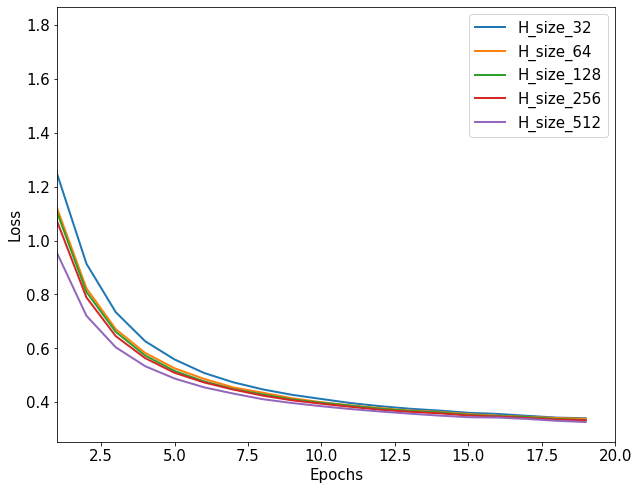

In [ ]:
H_list = [32,64,128,256,512]
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,8))
for i in range(5):
    # train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
    # valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
    plt.plot(dict_valL[H_list[i]],label="H_size_" + str(H_list[i]),linewidth=2)
    #plt.plot(val_acc_l,c='r',label="Validation Acc",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(1,20)
plt.legend()
plt.show()

In [ ]:
lr_list = [1e-5,1e-4,1e-3,1e-2,1e-1]
dict_trainL = {}
dict_valL = {}
dict_trainAcc={}
dict_valAcc={}

for lr in lr_list:
    D_in = 28*28; H = 128; D_out = 10
    model = mymodel(D_in, H, D_out)

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    if torch.cuda.is_available():
        model.to('cuda')
    # Initialize steps
    step = 0
    epochs=20
    train_loss_list = []
    valid_loss_list = []
    train_acc_l = []
    val_acc_l = []
    # Iterate over number of epochs
    for e in range(epochs):
        running_loss_train = 0 
        running_loss_valid = 0
        validation_correct = 0
        validation_total = 0

        training_correct = 0
        training_total = 0  
                      
        

        # Iterate over the entire training dataset
        # one batch per iteration 
        for inputs, labels in train_loader:

            # Clear the gradients of all optimized tensors
            inputs = inputs.view(inputs.shape[0], -1)

            optimizer.zero_grad()
            if torch.cuda.is_available():
                inputs, labels = inputs.to('cuda'), labels.to('cuda')   
            else:
                inputs, labels = input_images, labels        
            # Forward pass
            model.train()
            outputs = model.forward(inputs)
            _, predicted = torch.max(outputs.data, 1)
            #print(predicted,labels)
        
            #print(predicted,labels)

            training_total += labels.size(0)
            training_correct += (predicted == labels).sum().item() 
            #no_grad() prevents tracking history (and using memory)
            # with torch.no_grad(): 
                
            #     # Iterate over the entire validation dataset
            #     for input_images3, labels3 in train_loader:
                    
            #         # Enable CUDA: use GPUs for model computation
            #         if torch.cuda.is_available():
            #             input_images3, labels3 = input_images3.to('cuda'), labels3.to('cuda')
                    
            #         # Make predictions 
            #         outputs3 = model(input_images3)
            #         #print(outputs3)
            #         _, predicted3 = torch.max(outputs3.data, 1)
            #         #print(predicted2,labels2)
                    
            #         # Count total and correct predictions
      

            
            train_loss = criterion(outputs, labels)
            
            train_acc = training_correct / training_total
            # Backward pass
            train_loss.backward()
            optimizer.step()
            
            # Calculate and print running training loss
            running_loss_train += train_loss.item()   
            
        with torch.no_grad():    
                #count=0         
                # Iterate over the entire validation dataset
                for input_images2, labels2 in validation_loader:
                    
                    # Enable CUDA: use GPUs for model computation
                    #count+=1
                    #print(count)
                    input_images2 = input_images2.view(input_images2.shape[0], -1)
                    if torch.cuda.is_available():
                        input_images2, labels2 = input_images2.to('cuda'), labels2.to('cuda')
                    
                    # Make predictions 
                    outputs2 = model.forward(input_images2)
                    _, predicted2 = torch.max(outputs2.data, 1)
                    #print(predicted2,labels2)
                    
                    # Count total and correct predictions
                    validation_total += labels2.size(0)
                    validation_correct += (predicted2 == labels2).sum().item()   
                    valid_loss = criterion(outputs2, labels2)
                    val_acc = validation_correct / validation_total
                    running_loss_valid += valid_loss.item()  
        
        print("Epoch: {}/{}... ".format(e+1, epochs),
              "| Train Loss: {:.4f}".format(running_loss_train/len(train_loader)),
              "| Val Loss: {:.4f}".format(running_loss_valid/len(validation_loader)),
              "| Train Acc: {:.4f}".format(train_acc),
              "| Val Acc: {:.4f}".format(val_acc))
        train_loss_list.append(running_loss_train/len(train_loader))
        valid_loss_list.append(running_loss_valid/len(validation_loader))
        train_acc_l.append(train_acc)
        val_acc_l.append(val_acc)
              
        running_loss_train = 0
        running_loss_valid = 0
    dict_trainL[lr] = train_loss_list
    dict_valL[lr] = valid_loss_list
    dict_trainAcc[lr] = train_acc
    dict_valAcc[lr] = val_acc

Epoch: 1/20...  | Train Loss: 2.3547 | Val Loss: 2.3554 | Train Acc: 0.0802 | Val Acc: 0.0809
Epoch: 2/20...  | Train Loss: 2.3465 | Val Loss: 2.3469 | Train Acc: 0.0808 | Val Acc: 0.0800
Epoch: 3/20...  | Train Loss: 2.3387 | Val Loss: 2.3395 | Train Acc: 0.0818 | Val Acc: 0.0816
Epoch: 4/20...  | Train Loss: 2.3311 | Val Loss: 2.3314 | Train Acc: 0.0847 | Val Acc: 0.0842
Epoch: 5/20...  | Train Loss: 2.3238 | Val Loss: 2.3238 | Train Acc: 0.0880 | Val Acc: 0.0868
Epoch: 6/20...  | Train Loss: 2.3167 | Val Loss: 2.3168 | Train Acc: 0.0911 | Val Acc: 0.0893
Epoch: 7/20...  | Train Loss: 2.3098 | Val Loss: 2.3101 | Train Acc: 0.0954 | Val Acc: 0.0943
Epoch: 8/20...  | Train Loss: 2.3032 | Val Loss: 2.3032 | Train Acc: 0.1009 | Val Acc: 0.0988
Epoch: 9/20...  | Train Loss: 2.2968 | Val Loss: 2.2964 | Train Acc: 0.1076 | Val Acc: 0.1062
Epoch: 10/20...  | Train Loss: 2.2906 | Val Loss: 2.2904 | Train Acc: 0.1172 | Val Acc: 0.1171
Epoch: 11/20...  | Train Loss: 2.2846 | Val Loss: 2.2840 | 

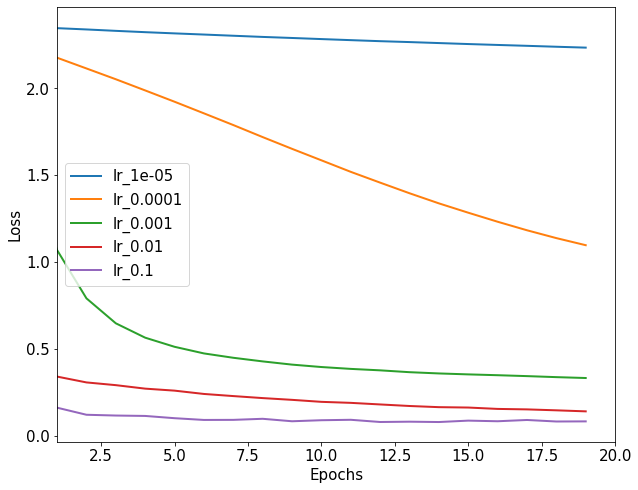

In [ ]:
lr_list = [1e-5,1e-4,1e-3,1e-2,1e-1]
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,8))
for i in range(5):
    # train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
    # valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
    plt.plot(dict_valL[lr_list[i]],label="lr_" + str(lr_list[i]),linewidth=2)
    #plt.plot(val_acc_l,c='r',label="Validation Acc",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(1,20)
plt.legend()
plt.show()
